Menu:
1. geometric_transformation
   1.1 coordinate_mapping
   1.2 Rotate
   1.3 Scale
   1.4 Shift
2. segment
   2.1 Adaptive_thresholding
   2.2 Binary_dilation
   2.3 Binary_erosion
   2.4 Otsu
Bạn có thể nhập 1 chức năng hoặc kết hợp 2 chức năng (vd: 1.2 2.1)


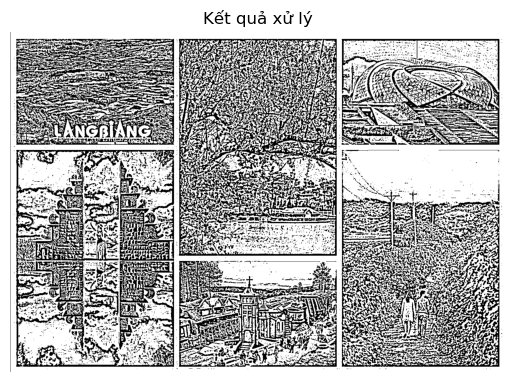

In [5]:
import cv2
import numpy as np
from scipy.ndimage import binary_dilation, binary_erosion
import matplotlib.pyplot as plt

def coordinate_mapping(img):
    return cv2.flip(img, 1)  # Lật ngang

def rotate(img, angle=45):
    h, w = img.shape[:2]
    center = (w//2, h//2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, M, (w, h), borderValue=255)

def scale(img, fx=1.5, fy=1.5):
    return cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

def shift(img, dx=50, dy=50):
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    h, w = img.shape[:2]
    return cv2.warpAffine(img, M, (w, h), borderValue=255)

def adaptive_thresholding(img):
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

def binary_dilation_func(img):
    _, bin_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    dilated = binary_dilation(bin_img, structure=np.ones((5,5))).astype(np.uint8) * 255
    return dilated

def binary_erosion_func(img):
    _, bin_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    eroded = binary_erosion(bin_img, structure=np.ones((5,5))).astype(np.uint8) * 255
    return eroded

def otsu(img):
    _, mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return mask

# Đọc ảnh
img = cv2.imread('dalat.jpg', 0)

# Menu
print("Menu:")
print("1. geometric_transformation")
print("   1.1 coordinate_mapping")
print("   1.2 Rotate")
print("   1.3 Scale")
print("   1.4 Shift")
print("2. segment")
print("   2.1 Adaptive_thresholding")
print("   2.2 Binary_dilation")
print("   2.3 Binary_erosion")
print("   2.4 Otsu")
print("Bạn có thể nhập 1 chức năng hoặc kết hợp 2 chức năng (vd: 1.2 2.1)")

choice = input("Nhập lựa chọn (vd: 1.2 2.1): ").split()

result = img.copy()
for c in choice:
    if c == "1.1":
        result = coordinate_mapping(result)
    elif c == "1.2":
        result = rotate(result)
    elif c == "1.3":
        result = scale(result)
    elif c == "1.4":
        result = shift(result)
    elif c == "2.1":
        result = adaptive_thresholding(result)
    elif c == "2.2":
        result = binary_dilation_func(result)
    elif c == "2.3":
        result = binary_erosion_func(result)
    elif c == "2.4":
        result = otsu(result)

cv2.imwrite('output_baitap4.jpg', result)
plt.imshow(result, cmap='gray')
plt.title('Kết quả xử lý')
plt.axis('off')
plt.show()



